In [179]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

In [180]:
class Data_Handler_CSV():
    #combining all tickers' adj price into one dataframe
    def __init__(self, csv_dir, tickers):
        #csv_dir: directory holding csv files, all files in the form 'ticker.csv'
        #tickers: list of tickers
        self.csv_dir=csv_dir;
        self.tickers=tickers
        
    def csv_to_df(self):
        #ensure all tickers' csv files exist first
        try:
            for ticker in self.tickers:
                file_path=os.path.join(self.csv_dir,'%s.csv'%ticker)
                if not os.path.isfile(file_path):
                    raise FileNotFoundError
        except:
            print(ticker+".csv not found")
            
        #combine all tickers' adj close 
        data=pd.io.parsers.read_csv(os.path.join(self.csv_dir,'%s.csv'%self.tickers[0]),header=0,index_col=0)
        data.rename(columns={'Adj Close':self.tickers[0]},inplace=True)
        data=data[[self.tickers[0]]]
        comb_index=data.index
        
        for ticker in self.tickers[1:]:
            new_data=pd.io.parsers.read_csv(os.path.join(self.csv_dir,'%s.csv'%ticker),header=0,index_col=0)
            new_data.rename(columns={'Adj Close':ticker},inplace=True)
            new_data=new_data[[ticker]]
            comb_index.union(new_data.index) #combination of all tickers' index,
            data=data.join(new_data,how='outer')
        data=data.reindex(comb_index).ffill() #replace NaN by previous valid num
        data.dropna(inplace=True) #drop first row if having NaN, which ffill() can't manage
        
        return data
            

In [181]:
csv_dir='C:/Users/jinji/Desktop/event-driven/heatmap'
tickers=['AAPL','TSLA','GOOGL','BA','SPY','QQQ']
data=Data_Handler_CSV(csv_dir,tickers)
df_data=data.csv_to_df()
print(df_data)

                  AAPL        TSLA        GOOGL          BA         SPY  \
Date                                                                      
2018-07-20   46.274609   62.716000  1197.880005  341.582214  264.941559   
2018-07-23   46.315697   60.639999  1211.000000  340.013367  265.434174   
2018-07-24   46.651688   59.486000  1258.150024  344.825745  266.769867   
2018-07-25   47.091614   61.748001  1275.939941  342.563934  269.043427   
2018-07-26   46.944168   61.330002  1285.500000  345.836334  268.408691   
...                ...         ...          ...         ...         ...   
2021-07-13  145.639999  668.539978  2546.830078  228.199997  435.589996   
2021-07-14  149.149994  653.380005  2564.739990  224.449997  436.239990   
2021-07-15  148.479996  650.599976  2540.100098  222.759995  434.750000   
2021-07-16  146.389999  644.219971  2539.399902  217.740005  431.339996   
2021-07-19  142.449997  646.219971  2491.560059  206.990005  424.970001   

                   QQQ  

In [182]:
df_pct=df_data.pct_change()

In [183]:
df_pct.dropna(inplace=True)
df_pct

,AAPL,TSLA,GOOGL,BA,SPY,QQQ
Date,,,,,,
2018-07-23,0.000888,-0.033102,0.010953,-0.004593,0.001859,0.003184
2018-07-24,0.007254,-0.019030,0.038935,0.014153,0.005032,0.004121
2018-07-25,0.009430,0.038026,0.014140,-0.006559,0.008523,0.013977
2018-07-26,-0.003131,-0.006769,0.007493,0.009553,-0.002359,-0.015151
2018-07-27,-0.016631,-0.030882,-0.025368,0.003702,-0.006776,-0.013496
...,...,...,...,...,...,...
2021-07-13,0.007889,-0.025026,0.002882,-0.042343,-0.003409,0.000000
2021-07-14,0.024100,-0.022676,0.007032,-0.016433,0.001492,0.001793
2021-07-15,-0.004492,-0.004255,-0.009607,-0.007530,-0.003416,-0.007023


In [184]:
df_corr=df_pct.corr(method='pearson')
df_corr

,AAPL,TSLA,GOOGL,BA,SPY,QQQ
AAPL,1.000000,0.425253,0.687255,0.417398,0.787558,0.868166
TSLA,0.425253,1.000000,0.377205,0.295211,0.435192,0.521937
GOOGL,0.687255,0.377205,1.000000,0.434316,0.786481,0.841196
BA,0.417398,0.295211,0.434316,1.000000,0.645579,0.495154
SPY,0.787558,0.435192,0.786481,0.645579,1.000000,0.923888
QQQ,0.868166,0.521937,0.841196,0.495154,0.923888,1.000000


In [201]:
mask=np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

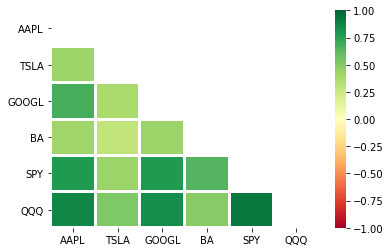

In [202]:
seaborn.heatmap(df_corr, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2)
plt.show()